In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import pickle

## Milan

### Week 2

In [2]:
week = 2
city = 'mi'
max_id = 10000
data = pd.read_csv(f'../data/{city}_to_{city}/{city}_to_{city}_week{week}.csv')
print(data.shape)
data.head()

(76226741, 3)


,square_id1,square_id2,strength
0,1,1,0.118609
1,1,2,0.121075
2,1,3,0.123701
3,1,4,0.111464
4,1,5,0.102187


In [3]:
with open(f'hotspots_{city}.pkl', 'rb') as file:
    hotspots = pickle.load(file)

#### Degree Centrality Uncleaned

In [4]:
degree_centralities = list()
for hp in hotspots:
    degree_centralities.append(data[(data.square_id1 == hp) &  
                                    (~(data.square_id2 == hp))].strength.sum())

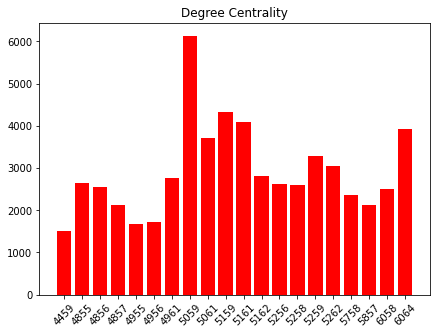

In [5]:
plt.figure(figsize=(7,5))
plt.title('Degree Centrality')
plt.bar(range(len(degree_centralities)), degree_centralities, color='red')
plt.xticks(range(len(degree_centralities)), hotspots, rotation=45)
plt.savefig(f'../plots/degree_centrality_{city}_week{week}_uncleaned.png')

#### Cleaning Data

In [6]:
data_cleaned = data[(data.square_id1.isin(hotspots)) & 
                    (data.square_id2.isin(hotspots))]
print(data_cleaned.shape)
data_cleaned.head()

(400, 3)


,square_id1,square_id2,strength
34726158,4459,4459,93.763392
34726518,4459,4855,3.418078
34726519,4459,4856,4.297780
34726520,4459,4857,4.034726
34726608,4459,4955,2.256819


#### Degree Centrality Clean

In [7]:
degree_centralities = list()
for hp in hotspots:
    degree_centralities.append(data_cleaned[(data_cleaned.square_id1 == hp) &  
                                            (~(data_cleaned.square_id2 == hp))].strength.sum())

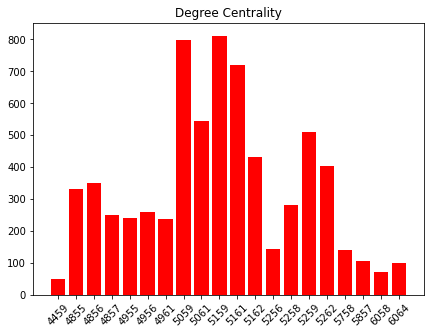

In [8]:
plt.figure(figsize=(7,5))
plt.title('Degree Centrality')
plt.bar(range(len(degree_centralities)), degree_centralities, color='red')
plt.xticks(range(len(degree_centralities)), hotspots, rotation=45)
plt.savefig(f'../plots/degree_centrality_{city}_week{week}.png')

#### Building Graph

In [9]:
G = nx.DiGraph()

In [10]:
for row in data_cleaned.values:
    G.add_edge(row[0], row[1], strength=row[2])

#### Closeness Centrality

In [11]:
closeness_centralities = list()
for hp in hotspots:
    cc = nx.closeness_centrality(G, hp, distance='strength') / 19
    closeness_centralities.append(cc)

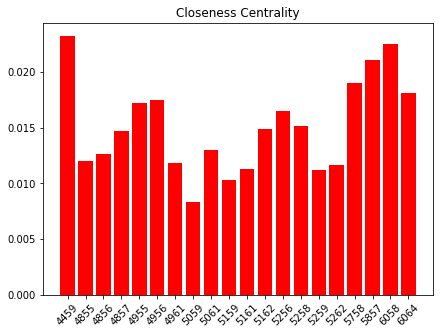

In [12]:
plt.figure(figsize=(7,5))
plt.title('Closeness Centrality')
plt.bar(range(len(closeness_centralities)), closeness_centralities, color='red')
plt.xticks(range(len(closeness_centralities)), hotspots, rotation=45)
plt.savefig(f'../plots/closeness_centrality_{city}_week{week}.png')

#### Betweenness Centrality

In [13]:
betweenness_centrality = nx.betweenness_centrality(G, normalized=False, weight='strength')

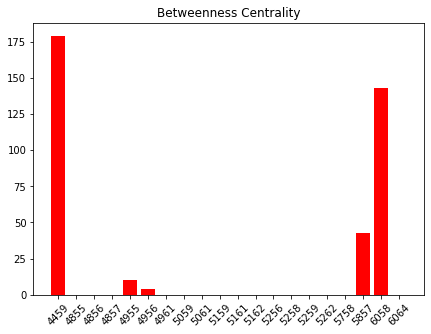

In [14]:
plt.figure(figsize=(7,5))
plt.title('Betweenness Centrality')
plt.bar(range(len(betweenness_centrality)), betweenness_centrality.values(), color='red')
plt.xticks(range(len(betweenness_centrality)), [int(x) for x in betweenness_centrality.keys()], rotation=45)
plt.savefig(f'../plots/betweenness_centrality_{city}_week{week}.png')

#### PageRank Centrality

In [15]:
pagerank_centrality = nx.pagerank(G, weight='strength')
pagerank_centrality

{4459.0: 0.026095421489208678,
 4855.0: 0.048986095600313674,
 4856.0: 0.04956227308950289,
 4857.0: 0.04013892340467469,
 4955.0: 0.03362145301892932,
 4956.0: 0.03825427558120984,
 4961.0: 0.03192286866020586,
 5059.0: 0.08844171673752117,
 5061.0: 0.06080775247588654,
 5159.0: 0.07631325391015112,
 5161.0: 0.09120482562612901,
 5162.0: 0.045866344985766964,
 5256.0: 0.03837683076848882,
 5258.0: 0.0398163666063544,
 5259.0: 0.08507946009787463,
 5262.0: 0.053017478703107836,
 5758.0: 0.02658964805269159,
 5857.0: 0.032681701856886576,
 6058.0: 0.04855464813315774,
 6064.0: 0.044668661201938735}

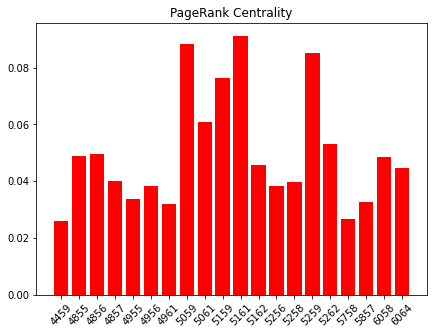

In [16]:
plt.figure(figsize=(7,5))
plt.title('PageRank Centrality')
plt.bar(range(len(pagerank_centrality)), pagerank_centrality.values(), color='red')
plt.xticks(range(len(pagerank_centrality)), [int(x) for x in pagerank_centrality.keys()], rotation=45)
plt.savefig(f'../plots/pagerank_centrality_{city}_week{week}.png')

#### Eigenvector Centrality

In [17]:
eigenvector_centrality = nx.eigenvector_centrality(G, weight='strength')
eigenvector_centrality

{4459.0: 0.009965556720611387,
 4855.0: 0.031812782046853894,
 4856.0: 0.033194362873918394,
 4857.0: 0.03410175140797127,
 4955.0: 0.016046995033421736,
 4956.0: 0.024542219771690563,
 4961.0: 0.054834102339583045,
 5059.0: 0.4769483303051264,
 5061.0: 0.2170942869605453,
 5159.0: 0.4062786727097794,
 5161.0: 0.5245467460142372,
 5162.0: 0.10861342537319157,
 5256.0: 0.029695221261724636,
 5258.0: 0.09340894997913375,
 5259.0: 0.49197268903560587,
 5262.0: 0.11606823382105044,
 5758.0: 0.011870865228013798,
 5857.0: 0.013389931069659675,
 6058.0: 0.013167914021774387,
 6064.0: 0.023010184037373135}

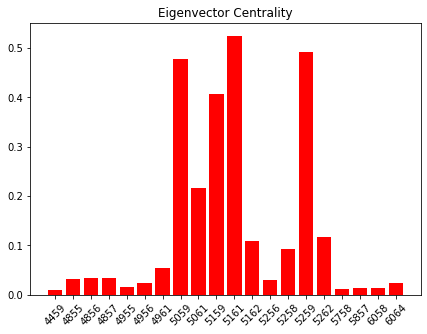

In [18]:
plt.figure(figsize=(7,5))
plt.title('Eigenvector Centrality')
plt.bar(range(len(eigenvector_centrality)), eigenvector_centrality.values(), color='red')
plt.xticks(range(len(eigenvector_centrality)), [int(x) for x in eigenvector_centrality.keys()], rotation=45)
plt.savefig(f'../plots/eigenvector_centrality_{city}_week{week}.png')